In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt

#for model-building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Upload the embedded Data from previous Milestone

In [3]:
# Path to the folder where the CSV files are saved
folder_path = '/content/drive/MyDrive/ML1010/Dataset/'

X_train_w2v = pd.read_csv(f'{folder_path}X_train_w2v.csv').values
X_test_w2v = pd.read_csv(f'{folder_path}X_test_w2v.csv').values

X_train_glove = pd.read_csv(f'{folder_path}X_train_glove.csv').values
X_test_glove = pd.read_csv(f'{folder_path}X_test_glove.csv').values

X_train_bert = pd.read_csv(f'{folder_path}X_train_bert.csv').values
X_test_bert = pd.read_csv(f'{folder_path}X_test_bert.csv').values

# Print the shapes of the variables to confirm they are loaded correctly

print(f'X_train_w2v shape: {X_train_w2v.shape}')
print(f'X_test_w2v shape: {X_test_w2v.shape}')
print(f'X_train_glove shape: {X_train_glove.shape}')
print(f'X_test_glove shape: {X_test_glove.shape}')
print(f'X_train_bert shape: {X_train_bert.shape}')
print(f'X_test_bert shape: {X_test_bert.shape}')

X_train_w2v shape: (35000, 100)
X_test_w2v shape: (15000, 100)
X_train_glove shape: (35000, 100)
X_test_glove shape: (15000, 100)
X_train_bert shape: (35000, 768)
X_test_bert shape: (15000, 768)


In [4]:
# Read only the 'sentiment' column from the CSV files
y_train = pd.read_csv(f'{folder_path}cleaned_train_df.csv', usecols=['sentiment']).values.ravel()
y_test = pd.read_csv(f'{folder_path}cleaned_test_df.csv', usecols=['sentiment']).values.ravel()

#Train a simple Bi-Directional LSTM

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1094/1094 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7822 - loss: 0.4603 - val_accuracy: 0.8447 - val_loss: 0.3562
Epoch 2/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.8402 - loss: 0.3709 - val_accuracy: 0.8495 - val_loss: 0.3482
Epoch 3/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8480 - loss: 0.3578 - val_accuracy: 0.8532 - val_loss: 0.3441
Epoch 4/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8474 - loss: 0.3557 - val_accuracy: 0.8535 - val_loss: 0.3419
Epoch 5/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8478 - loss: 0.3547 - val_accuracy: 0.8525 - val_loss: 0.3422
Epoch 6/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.8531 - loss: 0.3475 - val_accuracy: 0.8513 - val_loss: 0.3436
Epoch 7/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8502 - loss: 0.3499 - val_accuracy: 0.8487 - val_loss: 0.3491
Epoch 8/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8483 - loss: 0.3550 - val_accu

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1094/1094 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.6950 - loss: 0.5716 - val_accuracy: 0.7895 - val_loss: 0.4583
Epoch 2/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7771 - loss: 0.4781 - val_accuracy: 0.7918 - val_loss: 0.4500
Epoch 3/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7885 - loss: 0.4648 - val_accuracy: 0.7861 - val_loss: 0.4631
Epoch 4/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.7897 - loss: 0.4562 - val_accuracy: 0.7943 - val_loss: 0.4474
Epoch 5/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7886 - loss: 0.4545 - val_accuracy: 0.7935 - val_loss: 0.4475
Epoch 6/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7939 - loss: 0.4490 - val_accuracy: 0.7975 - val_loss: 0.4412
Epoch 7/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.7958 - loss: 0.4450 - val_accuracy: 0.7997 - val_loss: 0.4406
Epoch 8/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7938 - loss: 0.4497 - val_accu

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.7148 - loss: 0.5457 - val_accuracy: 0.8020 - val_loss: 0.4301
Epoch 2/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7871 - loss: 0.4570 - val_accuracy: 0.8103 - val_loss: 0.4172
Epoch 3/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7978 - loss: 0.4432 - val_accuracy: 0.8111 - val_loss: 0.4171
Epoch 4/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.7980 - loss: 0.4413 - val_accuracy: 0.8145 - val_loss: 0.4104
Epoch 5/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.8038 - loss: 0.4291 - val_accuracy: 0.8165 - val_loss: 0.4098
Epoch 6/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8069 - loss: 0.4251 - val_accuracy: 0.8145 - val_loss: 0.4036
Epoch 7/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8098 - loss: 0.4208 - val_accuracy: 0.8139 - val_loss: 0.4028
Epoch 8/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.8133 - loss: 0.4163 

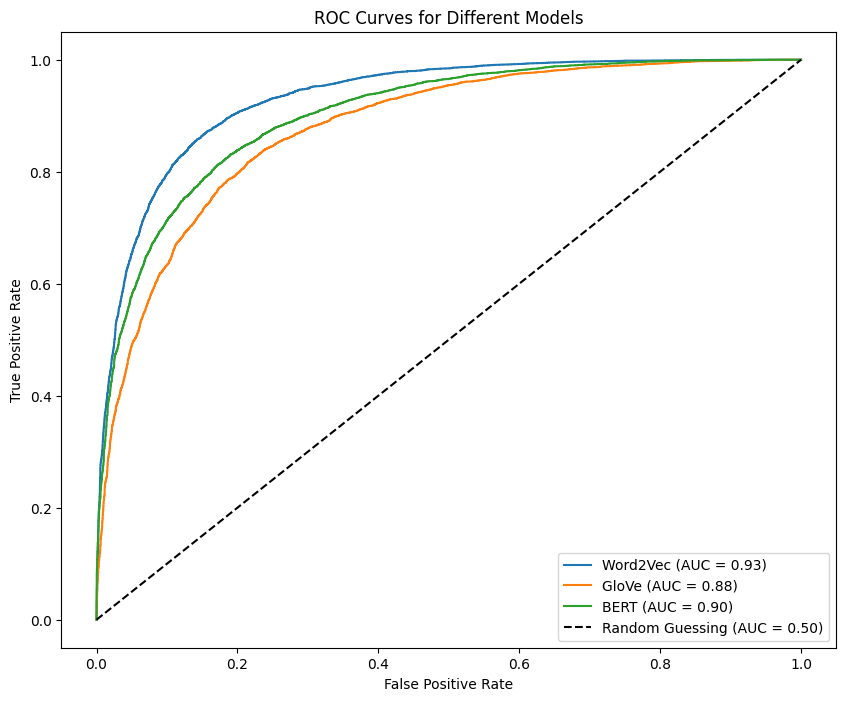

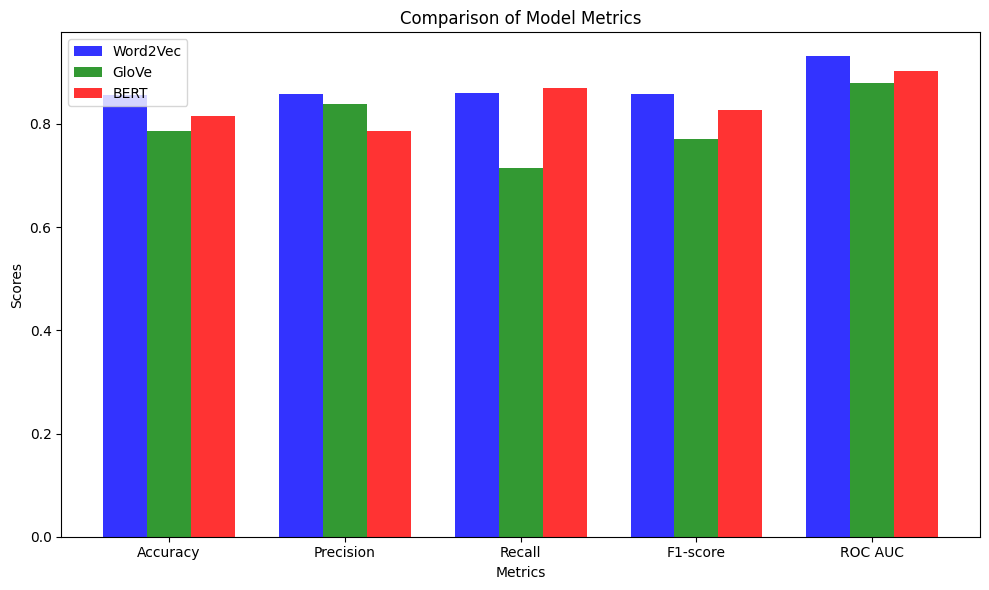

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Bidirectional, LSTM
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Initialize an empty list to store results for all models
results_word2vec = []
results_glove = []
results_bert = []

# Function to define a Bidirectional LSTM model
def create_bilstm(input_dim):
    model = Sequential([
        Bidirectional(LSTM(64, input_shape=(None, input_dim))),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Function to train, evaluate, and store results for a model
def train_evaluate_bilstm(X_train, X_test, y_train, y_test, method_name, results_list):
    input_dim = X_train.shape[1]

    # Reshape data for LSTM input (samples, time_steps, features)
    X_train_reshaped = np.expand_dims(X_train, axis=1)
    X_test_reshaped = np.expand_dims(X_test, axis=1)

    # Create the BiLSTM model
    model = create_bilstm(input_dim)

    # Train the model with progress visible
    history = model.fit(
        X_train_reshaped, y_train,
        epochs=10,
        batch_size=32,
        verbose=1,
        validation_data=(X_test_reshaped, y_test)
    )

    # Predict on test data
    y_pred_prob = model.predict(X_test_reshaped).flatten()
    y_pred = (y_pred_prob > 0.5).astype("int32")

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    # Append the results
    results_list.append({
        'Method': method_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'ROC AUC': roc_auc,
        'FPR': fpr,  # Store for ROC plot
        'TPR': tpr   # Store for ROC plot
    })

# Train and evaluate the model with Word2Vec embeddings
train_evaluate_bilstm(X_train_w2v, X_test_w2v, y_train, y_test, 'Word2Vec', results_word2vec)

# Train and evaluate the model with GloVe embeddings
train_evaluate_bilstm(X_train_glove, X_test_glove, y_train, y_test, 'GloVe', results_glove)

# Train and evaluate the model with BERT embeddings
train_evaluate_bilstm(X_train_bert, X_test_bert, y_train, y_test, 'BERT', results_bert)

# Convert results to DataFrames for better readability
results_word2vec_df = pd.DataFrame(results_word2vec)
results_glove_df = pd.DataFrame(results_glove)
results_bert_df = pd.DataFrame(results_bert)

# Display the comparison table for all models
print("Results for Word2Vec Model:")
print(results_word2vec_df)
print("\nResults for GloVe Model:")
print(results_glove_df)
print("\nResults for BERT Model:")
print(results_bert_df)

# Plot ROC curves for all models
plt.figure(figsize=(10, 8))

# Plot for Word2Vec Model
for result in results_word2vec:
    plt.plot(result['FPR'], result['TPR'], label=f"{result['Method']} (AUC = {result['ROC AUC']:.2f})")

# Plot for GloVe Model
for result in results_glove:
    plt.plot(result['FPR'], result['TPR'], label=f"{result['Method']} (AUC = {result['ROC AUC']:.2f})")

# Plot for BERT Model
for result in results_bert:
    plt.plot(result['FPR'], result['TPR'], label=f"{result['Method']} (AUC = {result['ROC AUC']:.2f})")

# Add random guessing line
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing (AUC = 0.50)")
plt.title("ROC Curves for Different Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

# Additional comparisons: Bar plots for accuracy, precision, recall, f1-score, and ROC AUC

# Prepare DataFrames to plot the metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC AUC']
metrics_word2vec = [results_word2vec_df[metric].mean() for metric in metrics]
metrics_glove = [results_glove_df[metric].mean() for metric in metrics]
metrics_bert = [results_bert_df[metric].mean() for metric in metrics]

# Plot bar charts
fig, ax = plt.subplots(figsize=(10, 6))

# Bar plot for comparison of metrics
index = np.arange(len(metrics))
bar_width = 0.25
opacity = 0.8

bar1 = ax.bar(index, metrics_word2vec, bar_width, alpha=opacity, color='b', label='Word2Vec')
bar2 = ax.bar(index + bar_width, metrics_glove, bar_width, alpha=opacity, color='g', label='GloVe')
bar3 = ax.bar(index + 2 * bar_width, metrics_bert, bar_width, alpha=opacity, color='r', label='BERT')

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Metrics')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(metrics)
ax.legend()

plt.tight_layout()
plt.show()

#Train a Simple CNN

In [9]:
X_train_bert.shape

(35000, 768)

Epoch 1/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5656 - loss: 0.6779 - val_accuracy: 0.6968 - val_loss: 0.5886
Epoch 2/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6888 - loss: 0.5948 - val_accuracy: 0.6547 - val_loss: 0.6126
Epoch 3/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6970 - loss: 0.5791 - val_accuracy: 0.6952 - val_loss: 0.5710
Epoch 4/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7096 - loss: 0.5723 - val_accuracy: 0.7193 - val_loss: 0.5511
Epoch 5/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7170 - loss: 0.5621 - val_accuracy: 0.7169 - val_loss: 0.5516
Epoch 6/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7131 - loss: 0.5625 - val_accuracy: 0.7191 - val_loss: 0.5490
Epoch 7/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7226 - loss: 0.5559 - val_accuracy: 0.7257 - val_loss: 0.5446
Epoch 8/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7256 - loss: 0.5527 - 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Results for Word2Vec Model:
     Method  Accuracy  Precision    Recall  F1-score   ROC AUC  \
0  Word2Vec  0.702267   0.801157  0.547371  0.650384  0.807395   

                                                 FPR  \
0  [0.0, 0.0, 0.0, 0.00026986911347996224, 0.0002...   

                                                 TPR  
0  [0.0, 0.00013176966662274345, 0.00658848333113...  

Results for GloVe Model:
  Method  Accuracy  Precision    Recall  F1-score   ROC AUC  \
0  GloVe    0.6184   0.671826  0.480432  0.560234  0.673718   

                                                 FPR  \
0  [0.0, 0.0, 0.0, 0.00013493455673998112, 0.0001...   

                                                 TPR  
0  [0.0, 0.00013176966662274345, 0.00039530899986...  

Results for BERT Model:
  Method  Accuracy  Precision  Recall  F1-score  ROC AUC         FPR  \
0   BERT  0.494067        0.0     0.0       0.0      0.5  [0.0, 1.0]   

          TPR  
0  [0.0, 1.0]  


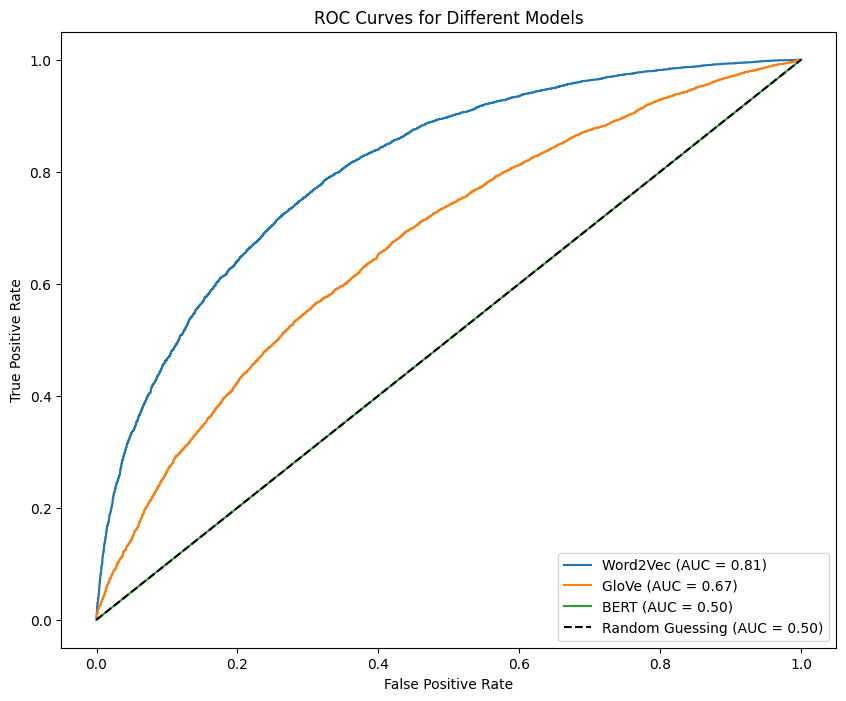

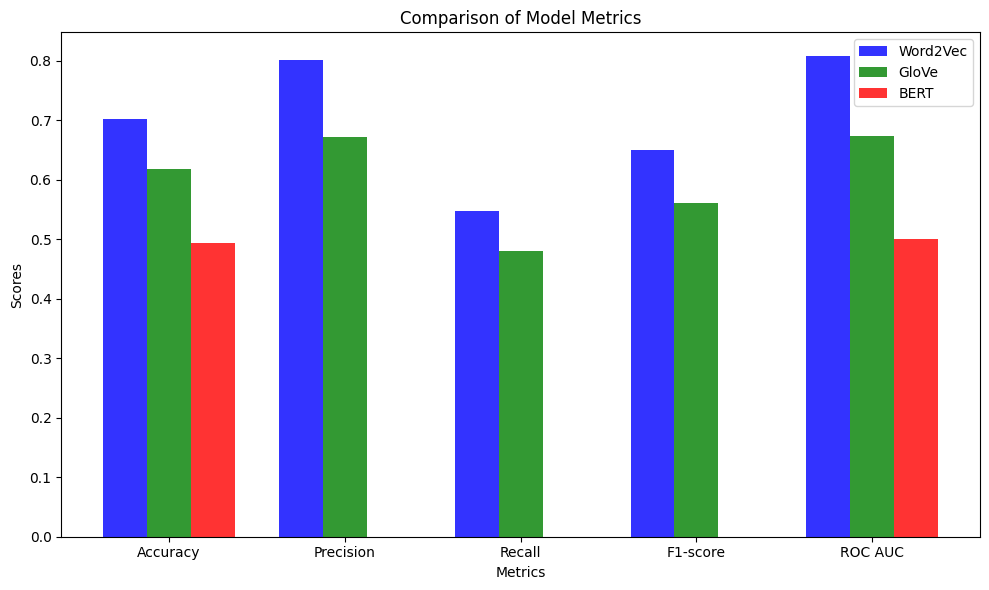

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, GlobalMaxPooling1D, Input
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Initialize an empty list to store results
results_word2vec = []
results_glove = []
results_bert = []

# Function to define a CNN model
def create_cnn(input_dim):
    model = Sequential([
        Input(shape=(input_dim, 1)),
        Conv1D(filters=64, kernel_size=3, activation='relu'),
        GlobalMaxPooling1D(),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Function to train, evaluate, and store results for a model
def train_evaluate_cnn(X_train, X_test, y_train, y_test, method_name, results_list):
    input_dim = X_train.shape[1]

    # Reshape data for CNN input (samples, time_steps, features)
    X_train_reshaped = np.expand_dims(X_train, axis=-1)
    X_test_reshaped = np.expand_dims(X_test, axis=-1)

    # Create the CNN model
    model = create_cnn(input_dim)

    # Train the model with progress visible
    history = model.fit(
        X_train_reshaped, y_train,
        epochs=10,
        batch_size=32,
        verbose=1,
        validation_data=(X_test_reshaped, y_test)
    )

    # Predict on test data
    y_pred_prob = model.predict(X_test_reshaped).flatten()
    y_pred = (y_pred_prob > 0.5).astype("int32")

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    # Append the results
    results_list.append({
        'Method': method_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'ROC AUC': roc_auc,
        'FPR': fpr,  # Store for ROC plot
        'TPR': tpr   # Store for ROC plot
    })

# Train and evaluate the model with Word2Vec embeddings
train_evaluate_cnn(X_train_w2v, X_test_w2v, y_train, y_test, 'Word2Vec', results_word2vec)

# Train and evaluate the model with GloVe embeddings
train_evaluate_cnn(X_train_glove, X_test_glove, y_train, y_test, 'GloVe', results_glove)

# Train and evaluate the model with BERT embeddings
train_evaluate_cnn(X_train_bert, X_test_bert, y_train, y_test, 'BERT', results_bert)

# Convert results to DataFrames for better readability
results_word2vec_df = pd.DataFrame(results_word2vec)
results_glove_df = pd.DataFrame(results_glove)
results_bert_df = pd.DataFrame(results_bert)

# Display the comparison table for all models
print("Results for Word2Vec Model:")
print(results_word2vec_df)
print("\nResults for GloVe Model:")
print(results_glove_df)
print("\nResults for BERT Model:")
print(results_bert_df)

# Plot ROC curves for all models
plt.figure(figsize=(10, 8))

# Plot for Word2Vec Model
for result in results_word2vec:
    plt.plot(result['FPR'], result['TPR'], label=f"{result['Method']} (AUC = {result['ROC AUC']:.2f})")

# Plot for GloVe Model
for result in results_glove:
    plt.plot(result['FPR'], result['TPR'], label=f"{result['Method']} (AUC = {result['ROC AUC']:.2f})")

# Plot for BERT Model
for result in results_bert:
    plt.plot(result['FPR'], result['TPR'], label=f"{result['Method']} (AUC = {result['ROC AUC']:.2f})")

# Add random guessing line
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing (AUC = 0.50)")
plt.title("ROC Curves for Different Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

# Additional comparisons: Bar plots for accuracy, precision, recall, f1-score, and ROC AUC

# Prepare DataFrames to plot the metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC AUC']
metrics_word2vec = [results_word2vec_df[metric].mean() for metric in metrics]
metrics_glove = [results_glove_df[metric].mean() for metric in metrics]
metrics_bert = [results_bert_df[metric].mean() for metric in metrics]

# Plot bar charts
fig, ax = plt.subplots(figsize=(10, 6))

# Bar plot for comparison of metrics
index = np.arange(len(metrics))
bar_width = 0.25
opacity = 0.8

bar1 = ax.bar(index, metrics_word2vec, bar_width, alpha=opacity, color='b', label='Word2Vec')
bar2 = ax.bar(index + bar_width, metrics_glove, bar_width, alpha=opacity, color='g', label='GloVe')
bar3 = ax.bar(index + 2 * bar_width, metrics_bert, bar_width, alpha=opacity, color='r', label='BERT')

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Metrics')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(metrics)
ax.legend()

plt.tight_layout()
plt.show()

In [9]:
X_train_bert

array([[-0.49500576, -0.10508207,  0.08888768, ..., -0.5045156 ,
         0.49979034,  0.3916639 ],
       [-0.6281575 , -0.10931306,  0.4248838 , ..., -0.15811425,
         0.20133045, -0.0143118 ],
       [-0.19257948,  0.03820072,  0.40448532, ..., -0.28139472,
         0.04491444, -0.00189855],
       ...,
       [ 0.21642958, -0.14327674,  0.44804895, ..., -0.4868917 ,
         0.27317122,  0.26715118],
       [-0.08708962, -0.07086694,  0.2561294 , ..., -0.2073533 ,
         0.11818022,  0.18110347],
       [-0.17755018, -0.01837108,  0.35374105, ..., -0.53176177,
         0.2828073 , -0.02744289]])

#Fine Tune a Pre-Trained Bert Classifier

Epoch 1/30, Loss: 0.5996
Epoch 2/30, Loss: 0.5136
Epoch 3/30, Loss: 0.4842
Epoch 4/30, Loss: 0.4688
Epoch 5/30, Loss: 0.4589
Epoch 6/30, Loss: 0.4520
Epoch 7/30, Loss: 0.4463
Epoch 8/30, Loss: 0.4420
Epoch 9/30, Loss: 0.4383
Epoch 10/30, Loss: 0.4357
Epoch 11/30, Loss: 0.4327
Epoch 12/30, Loss: 0.4303
Epoch 13/30, Loss: 0.4283
Epoch 14/30, Loss: 0.4264
Epoch 15/30, Loss: 0.4246
Epoch 16/30, Loss: 0.4232
Epoch 17/30, Loss: 0.4218
Epoch 18/30, Loss: 0.4205
Epoch 19/30, Loss: 0.4195
Epoch 20/30, Loss: 0.4181
Epoch 21/30, Loss: 0.4172
Epoch 22/30, Loss: 0.4159
Epoch 23/30, Loss: 0.4151
Epoch 24/30, Loss: 0.4144
Epoch 25/30, Loss: 0.4134
Epoch 26/30, Loss: 0.4128
Epoch 27/30, Loss: 0.4120
Epoch 28/30, Loss: 0.4111
Epoch 29/30, Loss: 0.4106
Epoch 30/30, Loss: 0.4099
Accuracy: 0.8127
Precision: 0.8130
Recall: 0.8179
F1 Score: 0.8154


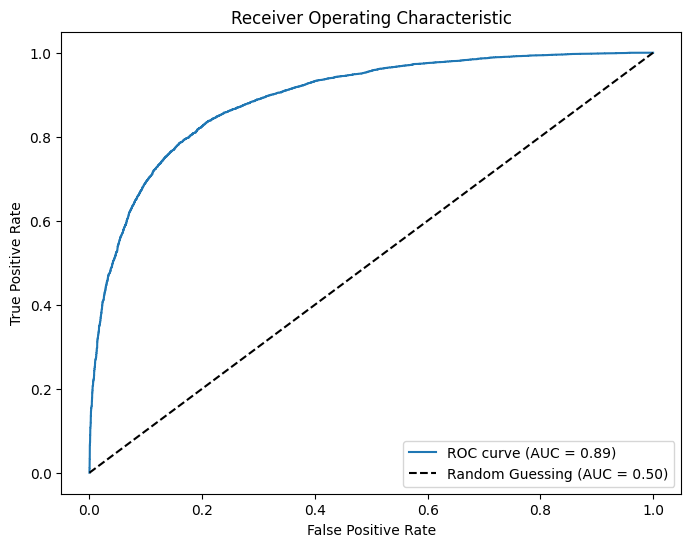

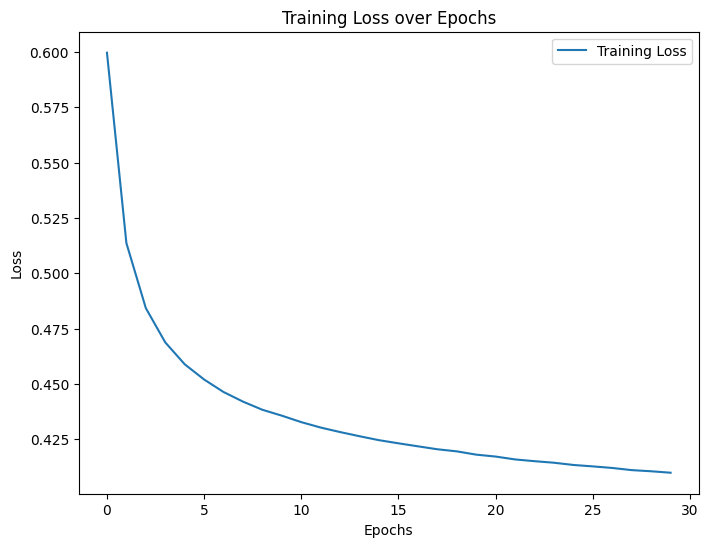

In [12]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from transformers import BertForSequenceClassification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Convert NumPy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train_bert, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test_bert, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create DataLoaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define the classification model
class BertEmbeddingClassifier(nn.Module):
    def __init__(self, input_dim, num_labels):
        super(BertEmbeddingClassifier, self).__init__()
        self.linear = nn.Linear(input_dim, num_labels)  # Final classification layer

    def forward(self, x):
        outputs = self.linear(x)
        return outputs

# Initialize model
model = BertEmbeddingClassifier(input_dim=768, num_labels=2)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Training loop with loss tracking for visualization
epochs = 30
train_losses = []
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for batch in train_loader:
        X_batch, y_batch = [item.to(device) for item in batch]

        # Forward pass
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        total_loss += loss.item()

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    avg_loss = total_loss / len(train_loader)
    train_losses.append(avg_loss)
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {avg_loss:.4f}")

# Model Evaluation
model.eval()
all_preds = []
all_labels = []
all_pred_probs = []  # For ROC curve

with torch.no_grad():
    for batch in test_loader:
        X_batch, y_batch = [item.to(device) for item in batch]

        outputs = model(X_batch)
        preds = torch.argmax(outputs, dim=1)
        probs = torch.softmax(outputs, dim=1)[:, 1]  # Probabilities for positive class

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(y_batch.cpu().numpy())
        all_pred_probs.extend(probs.cpu().numpy())

# Metrics calculation
accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds)
recall = recall_score(all_labels, all_preds)
f1 = f1_score(all_labels, all_preds)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# ROC Curve
fpr, tpr, _ = roc_curve(all_labels, all_pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing (AUC = 0.50)")
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

# Training Loss over Epochs Plot
plt.figure(figsize=(8, 6))
plt.plot(range(epochs), train_losses, label="Training Loss")
plt.title('Training Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()